In [22]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('bets.csv', sep=",")

In [4]:
data.head(1)

,bet_id,user_id,bet_type,sport,odds,is_win,stake,gain,GGR
0,bet_00001,3848,multiple,Ice Hockey,9.44,False,13.65,0.0,13.65


In [5]:
data.shape

(100000, 9)

In [ ]:
# Categorical variables are: bet_type, sport. Boolean: is_win.

In [13]:
categorical_vals = ['bet_type', 'sport', 'is_win']
for c in categorical_vals:
    print(data[c].value_counts())

bet_type
single      65014
multiple    34986
Name: count, dtype: int64
sport
Football        49222
Tennis          18138
Basketball       8167
Ice Hockey       5038
Volleyball       4023
Handball         3948
Snooker          3064
Baseball         2988
Table Tennis     2001
Rugby            1915
Formula 1         676
Badminton         516
Cycling           304
Name: count, dtype: int64
is_win
False    63553
True     36447
Name: count, dtype: int64


In [ ]:
# More observations are in category single sport(65014); top3 sport are: Footbal, Tennis, Basketball; most observations are in is_win category False-63553.

In [6]:
data.describe()

,user_id,odds,stake,gain,GGR
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2495.466980,4.700808,132.631652,119.285792,13.345860
std,1437.932303,4.471646,155.385469,423.864572,399.962988
min,1.000000,1.100000,0.100000,0.000000,-20595.230000
25%,1256.000000,1.320000,25.050000,0.000000,-10.822500
50%,2487.000000,3.180000,84.900000,0.000000,20.300000
75%,3735.000000,6.440000,188.850000,66.262500,115.000000
max,5000.000000,62.150000,1000.000000,21054.330000,999.950000


In [ ]:
# Numerical variables are: odds, stake, gain and GGR. 
# Variable stake has highest mean, lowest odds 4.7. STD hidgest gain and GGR. This measures how data are spread around mean.
# GGR has highest difference between min and max value. This can be indicated presents of outliers.

In [15]:
columns = ['odds', 'stake', 'gain', 'GGR']


skewness = data[columns].apply(skew)

# Calculate kurtosis (Fisher by default, so normal distribution = 0)
kurt = data[columns].apply(kurtosis)

# Combine into a single DataFrame for easy viewing
summary_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurt
})

print(summary_stats)

        Skewness    Kurtosis
odds    2.356537    9.610385
stake   2.478698    8.000747
gain   13.180251  349.505952
GGR   -12.709302  366.746047


In [ ]:
# Variables: odds, stake and gain have skewness> 0, which mean that have long taill on right; GGR has negative skewness long tailon left.
# All variables has kurtosis > 0, the distribution is more skewed than normal. Havy tails more outliers.

In [16]:
data.isnull().sum()

bet_id      0
user_id     0
bet_type    0
sport       0
odds        0
is_win      0
stake       0
gain        0
GGR         0
dtype: int64

In [ ]:
# There is no null values. In case that there would be outliers have been applyed tehniques for removing. Categorical missing will be field with most frequent values,
# numerical if normaly distributed with mean, if no with median. There need to be careful to not skew the distribution, so to pay attention on their numbers. 

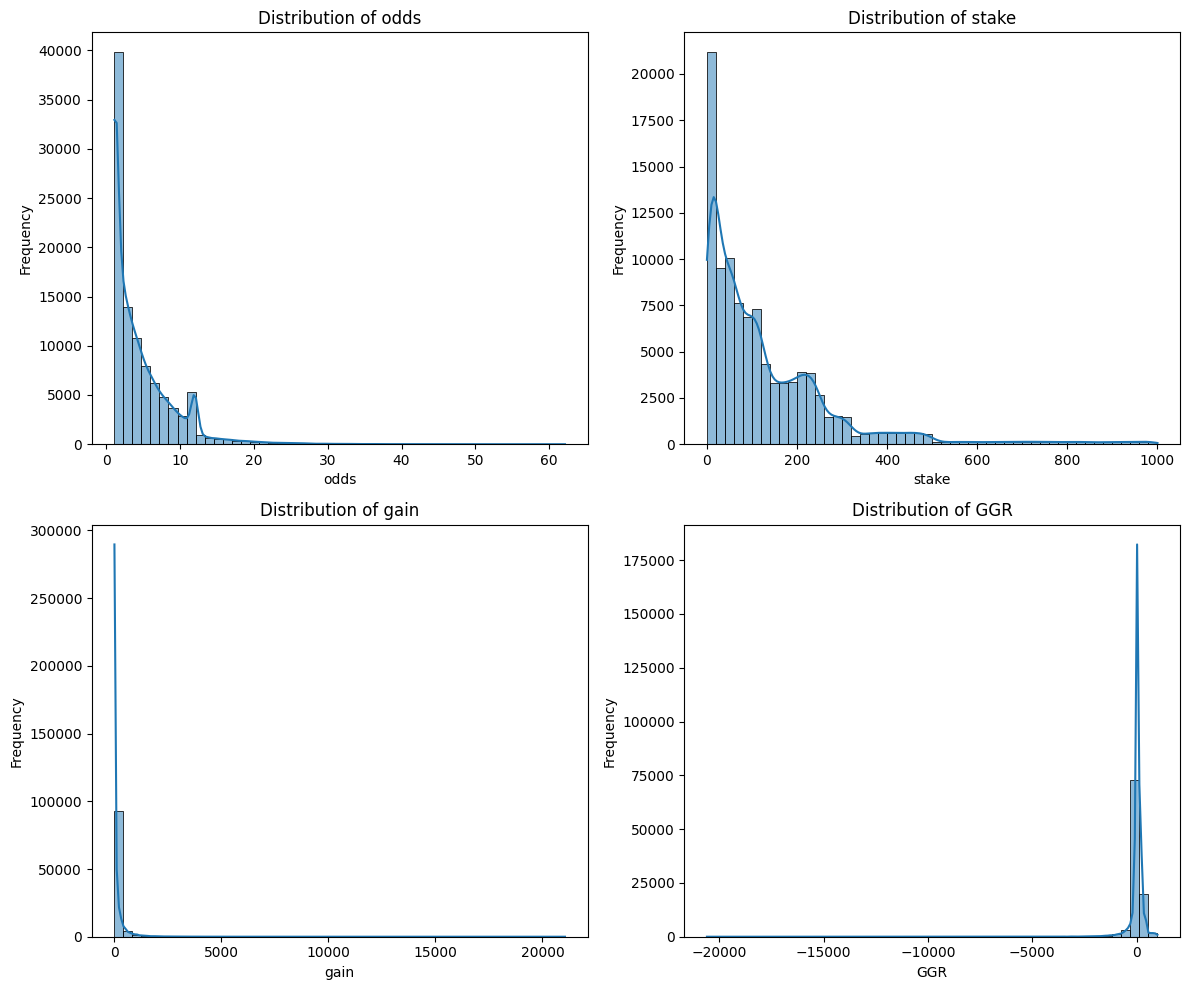

In [19]:
# Estimation of normal distribution

variables = ['odds', 'stake', 'gain', 'GGR']

# Set up 2x2 plot grid
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, index i
    sns.histplot(data[var], bins=50, kde=True, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# There is nonormaly distribution, as we conclude previously GGR has asymetric in left(high negative values), asymetric in right odds, stake, gain.

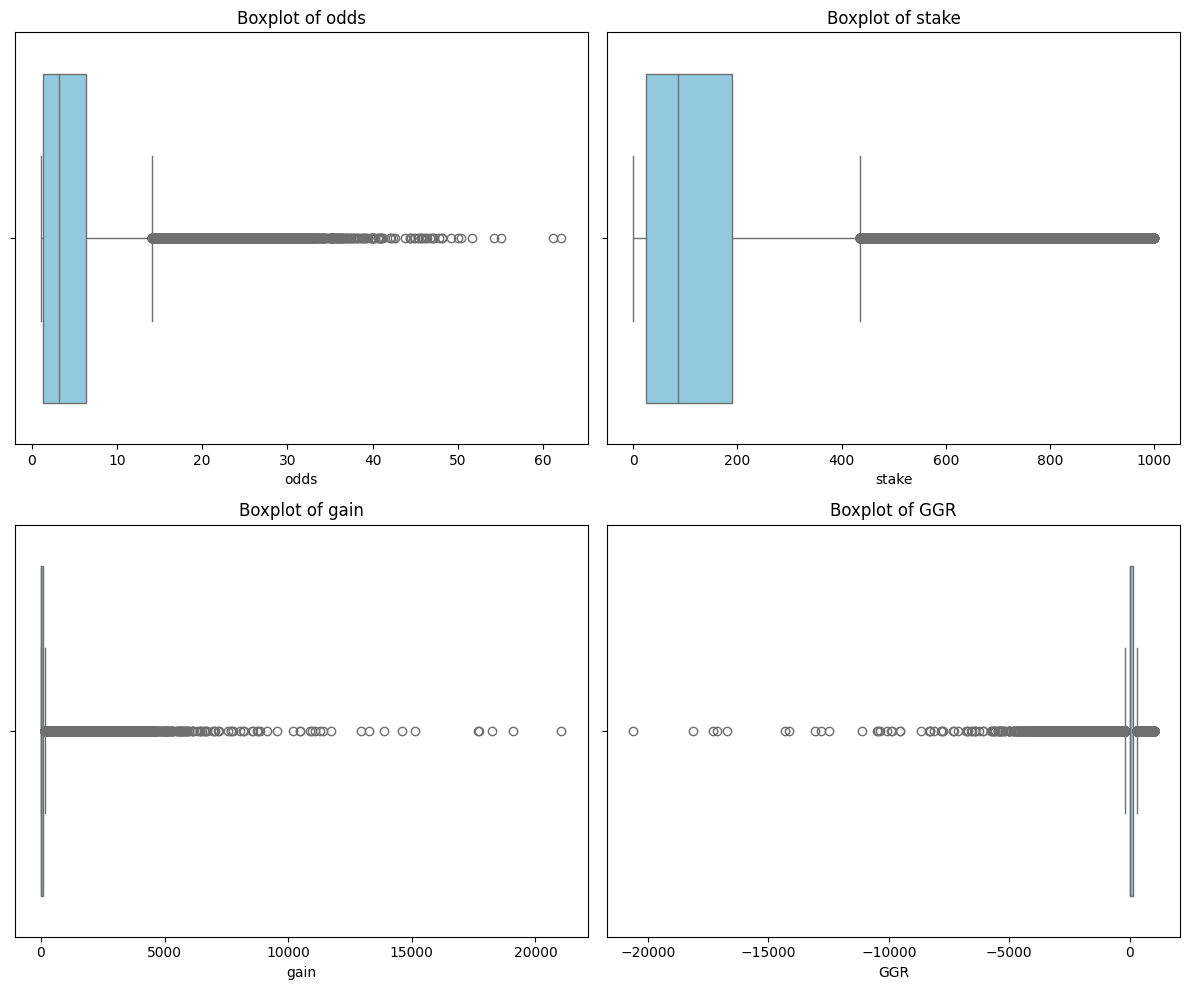

In [20]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[var], color='skyblue')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [ ]:
# Rectangle represent 50% of values, lines from it mina and max value. odds, gain and stake has positive outliers, GGR negative.

In [ ]:
# Dealing with ouliers

In [23]:
# Log transformation for right_skewed variables:
data['odds_log'] = np.log1p(data['odds'])   # log(1 + x) is safe for 0
data['stake_log'] = np.log1p(data['stake'])
data['gain_log'] = np.log1p(data['gain'])

In [24]:
GGR_reflected = data['GGR'].max() - data['GGR']

# Apply log transform
data['GGR_log'] = np.log1p(GGR_reflected)

In [25]:
data.head(1)

,bet_id,user_id,bet_type,sport,odds,is_win,stake,gain,GGR,odds_log,stake_log,gain_log,GGR_log
0,bet_00001,3848,multiple,Ice Hockey,9.44,False,13.65,0.0,13.65,2.345645,2.68444,0.0,6.894974


In [26]:
without_otliers= data[['bet_id', 'user_id', 'bet_type', 'sport', 'is_win', 'odds_log', 'stake_log', 'gain_log', 'GGR_log']]

In [27]:
without_otliers.to_csv('cleaned_dataset.csv', index=False)